<a href="https://colab.research.google.com/github/iSwami/IFG-IA/blob/main/Linear_Regression_Graphics_osvaldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear Múltipla

O objetivo deste notebook é explorar a regressão múltipla e engenharia de atributos com as funções da API Scikit-learn.

Neste notebook você irá manipular dados de transações imobiliárias de King County para prever preços usando regressão múltipla. Desta forma, você poderá:
* Usar Pandas DataFrames para realizar algumas atividades de engenharia de atributos
* Usar funções do Scikit-learn para computar os coeficientes de regressão (pesos/parâmetros)
* Dados os coeficientes de regressão, os preditores e a saída (preços), criar uma função para computar erro utilizando a técnica de mínimos quadrados (Residual Sum of Squares).
* Visualizar os coeficientes e interpretar seus significados

## Importação das bibliotecas

Importação de bibliotecas necessárias para a execução dos comandos:
* Pandas: para manipulação dos dados
* Numpy: para compatibilizar o uso de dados por algumas funções
* Datetime: para formatar um dos atributos da base de dados
* Sklearn: para uso comparativo de funções de regressão linear

In [4]:
# Instalar bibliotecas
!pip install catboost
!pip install google-colab
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00


# **Trabalho Final Machine Learning**


Tópicos analisados na disciplina de aprendizado de máquina:

1. Apresentar 2 métodos de aprendizado de máquina no problema KC_House_Data:
por exemplo: MLR e DecisionTreeRegressor;
2. Comparar e comentar a performance dos algoritmos de regressão com relação a diferentes indicadores;
3. Incluir na análise comparativa: média, de 10 execuções dos algoritmos, melhor valor encontrado, pior valor encontrado e desvio padrão;
4. Configure o k-folds com diferentes valores de seed para garantir diferentes reamostragens; e
5. Apresentar os dados relativos a uma das execuções com respeito a: maior valor encontrado, menor valor encontrado e valor médio, com respeito aos k-folds.

# **Importação de Bibliotecas**

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
import google.colab
from pandas import DataFrame
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import xgboost as xgb
from catboost import CatBoostRegressor
from numpy import mean
from numpy import std

# Importar a biblioteca do Google Colab
from google.colab import data_table

# Habilitar a formatação de tabela interativa
data_table.enable_dataframe_formatter()


# Montar o Google Drive no Colab, localizar e ler arquivo no formato de tabela dinâmica

In [29]:
from google.colab import drive

# Solicitar a autenticação e fornecer um link para obter o código de autenticação
drive.mount('/content/drive')

# Indicar o Caminho do Arquivo no Google Drive
caminho_do_arquivo = '/content/drive/MyDrive/ia ifg 2023/kc_house_data.csv'

# Carregar o arquivo usando o caminho do Google Drive
sales = pd.read_csv('/content/drive/MyDrive/ia ifg 2023/kc_house_data.csv')

# Usar a extensão data_table para exibir o DataFrame como uma tabela interativa
data_table.DataTable(sales, include_index=False, num_rows_per_page=10)

sales

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

# **Divisão entre Variáveis Independentes e Dependente**

In [30]:
X = sales.drop('price', axis=1)  # Substitua 'Alvo' pela coluna que você está tentando prever
y = sales['price']

# **Configuração K-Folds**

In [31]:
num_folds = 10
seed = 42
kf = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

# **Pré-processamento dos dados**

In [36]:
# Remover colunas não numéricas e desnecessárias
colunas_numericas = date.select_dtypes(include=[np.number]).columns
dados_numericos = date[colunas_numericas]

# Lidar com a data
dados_numericos['date'] = pd.to_datetime(programas['date']).dt.year

# Substituir os valores ausentes (NaN) por 0
dados_numericos = dados_numericos.fillna(0)

# Separar variáveis independentes e dependente
X = dados_numericos.drop('price', axis=1)
y = dados_numericos['price']

# Inicialização do modelo
modelo_mlr = LinearRegression()

# Execução do modelo
resultados_mlr = cross_val_score(modelo_mlr, X, y, cv=kf, scoring=scorer)

NameError: ignored

# **Avaliação de Desempenho**

In [16]:
# Inicialização dos Modelos
modelo_mlr = LinearRegression()
modelo_tree = DecisionTreeRegressor()

# Funções de Avaliação
def calcular_metricas(y_true, y_pred):
    return {'R²': r2_score(y_true, y_pred),
            'MAE': mean_absolute_error(y_true, y_pred),
            'MSE': mean_squared_error(y_true, y_pred)}

scorer = make_scorer(calcular_metricas, greater_is_better=True)

# Execução dos Modelos
resultados_mlr = cross_val_score(modelo_mlr, X, y, cv=kf, scoring=scorer)
resultados_tree = cross_val_score(modelo_tree, X, y, cv=kf, scoring=scorer)


ValueError: ignored

### Leitura dos dados

O dataset contém dados de transações imobiliárias de King County, região aonde está a cidade de Seattle, USA.

## Análise Exploratória dos Dados - Exploratory Data Analysis (EDA) e Pré-processamento

Antes de criarmos o modelo de regressão, vamos primeiro explorar os dados:
* Por meio do uso de algumas funções nativas do Pandas (**.info()** e **.describe()**) é possível extrair uma visão geral dos atributos do dataset;
    * A função *info()* retorna informações específicas sobre os tipos de dados de cada um dos atributos, além de informações sobre uso de memória pela estrutura do mesmo;
    * A função *describe()* retorna informações estatísticas em geral referentes aos dados de cada atributo.

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
sales.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.369500      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.907971      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     11.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

from matplotlib import pyplot as plt
_df_24['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['bathrooms'].plot(kind='hist', bins=20, title='bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['sqft_living'].plot(kind='hist', bins=20, title='sqft_living')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='price', y='bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='bedrooms', y='bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='bathrooms', y='sqft_living', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='sqft_living', y='sqft_lot', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['bedrooms'].plot(kind='line', figsize=(8, 4), title='bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['bathrooms'].plot(kind='line', figsize=(8, 4), title='bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['sqft_living'].plot(kind='line', figsize=(8, 4), title='sqft_living')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='price', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='bedrooms', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='bathrooms', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_40['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_40, x='sqft_living', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#### Eliminação manual de atributos que direta ou indiretamente não contribuem para o modelo

Remoção dos atributos *'id' e 'date'*

In [ ]:
sales.drop(['id'],axis=1,inplace=True)
sales.drop(['date'],axis=1,inplace=True)

#### Verificação de quantos objetos contém valor igual a ZERO para cada um dos parâmetros
Esta análise indica, de imediato, uma "luz vermelha" que devemos considerar quanto aos parâmetros **waterfront**, **view**, **yr_renovated** e **sqft_basement**.
* Quase todos os parâmetros contém aproximadamente **90%** ou mais de seus dados com valor igual a zero.

In [ ]:
(sales[sales[sales.columns] == 0]).count()

price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

#### Verificação de quantos valores únicos cada atributo possui
Esta verificação foi realizada para se ter uma visão geral dos intervalos de valores que cada atributo apresenta.

In [ ]:
sales.nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

O comando abaixo identifica os atributos com menor quantidade de valores únicos (<= 30):

In [ ]:
observe = []
for col in sales.columns:
    if len(sales[col].unique()) <= 30:
        observe.append(col)
print(observe)

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']


Impressão das faixas de valores de cada um dos atributos idenficados acima:

In [ ]:
for col in observe:
    print(col, sales[col].unique())

bedrooms [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
floors [1.  2.  1.5 3.  2.5 3.5]
waterfront [0 1]
view [0 3 4 2 1]
condition [3 5 4 1 2]
grade [ 7  6  8 11  9  5 10 12  4  3 13  1]


In [ ]:
sales[sales['bedrooms'] == 33]

Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['price']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'price'}, axis=1)
              .sort_values('price', ascending=True))
  xs = counted['price']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['bedrooms']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'bedrooms'}, axis=1)
              .sort_values('bedrooms', ascending=True))
  xs = counted['bedrooms']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('bedrooms', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bedrooms')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['bathrooms']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'bathrooms'}, axis=1)
              .sort_values('bathrooms', ascending=True))
  xs = counted['bathrooms']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_44.sort_values('bathrooms', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bathrooms')
_ = plt.ylabel('count()')

Substituição de valor discrepante (outlier) contido em um dos objetos (linha nº 15870) do dataset para o número de quartos. O valor foi substituído pela média de todas as casas com o preço igual ao desta casa.

In [ ]:
sales['bedrooms'] = sales['bedrooms'].replace([33], int(sales[sales['price'] == 640000]['bedrooms'].mean()))

Especificação dos atributos para impressão de gráficos com fins de análise dos mesmos. A remoção do atributo "date" foi feita para não gerar erro ao plotar os gráficos.

In [ ]:
columns = sales.columns.tolist()
columns.remove('price')

### Histogramas

Um histograma é uma espécie de gráfico de barras que demonstra uma distribuição de frequências. No histograma, a base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência absoluta com que o valor de cada classe ocorre.

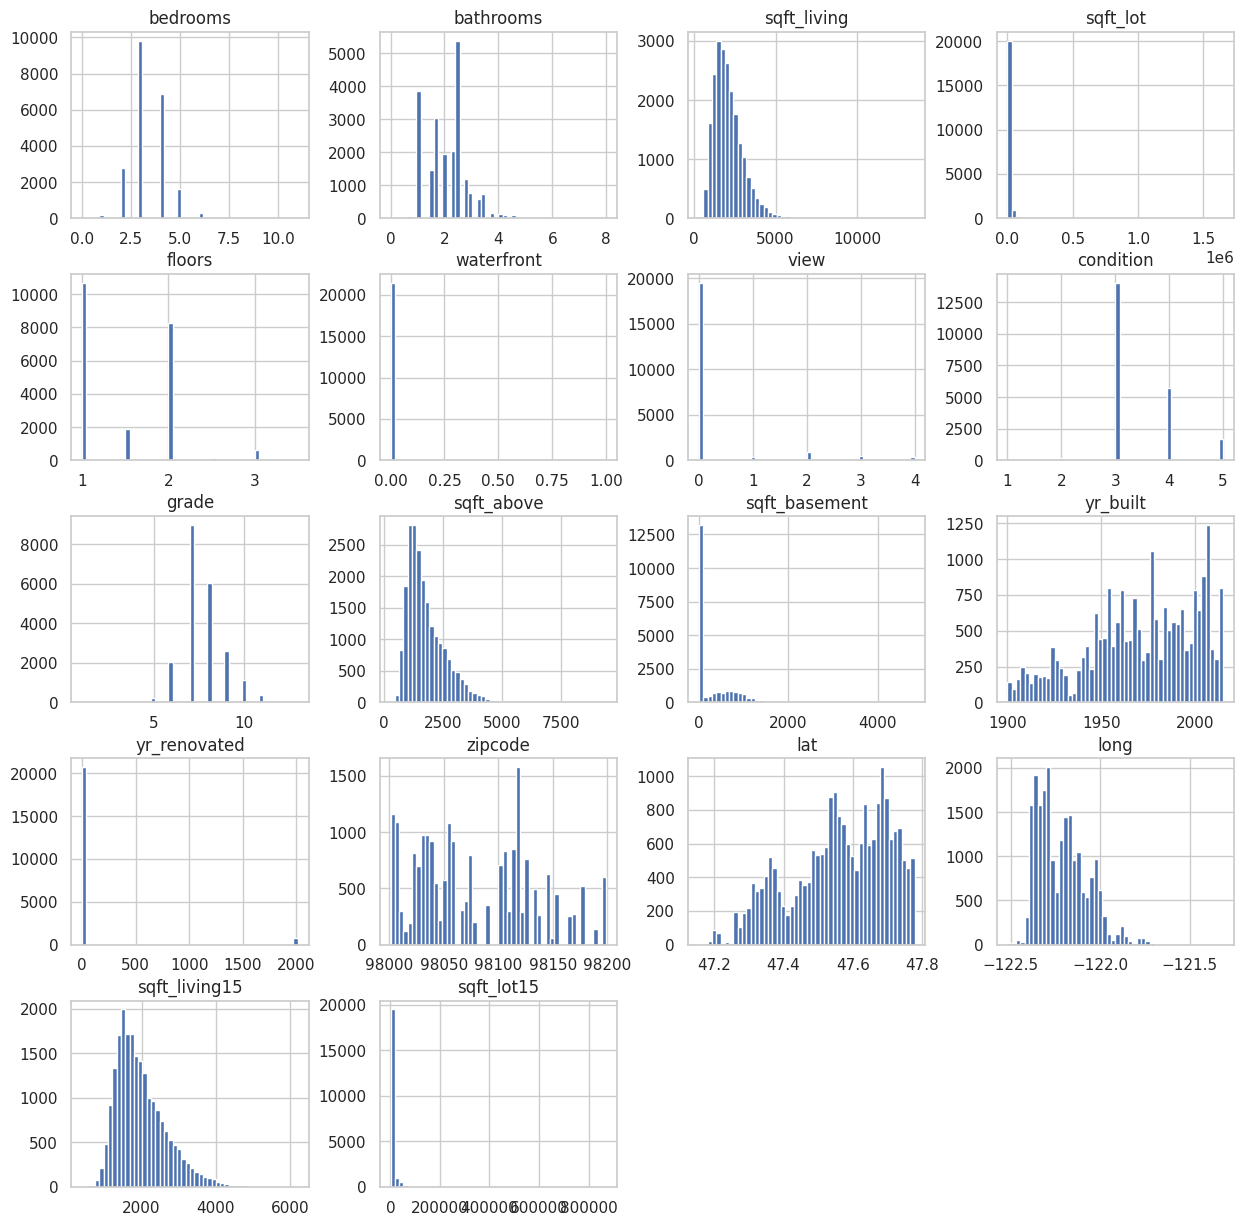

In [ ]:
sales[columns].hist(bins=50,figsize=(15,15))
plt.show()

### Gráficos de Dispersão (Scatter Plot)

Os gráficos de dispersão são utilizados para determinar a força de um relacionamento entre duas variáveis numéricas. O eixo-x representa a variável independente e o eixo-y representa a variável dependente.

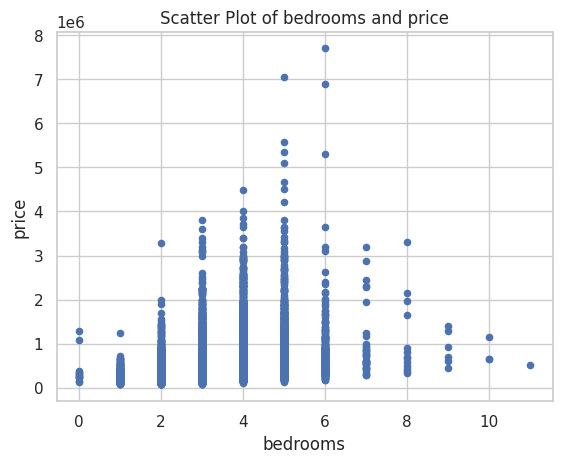

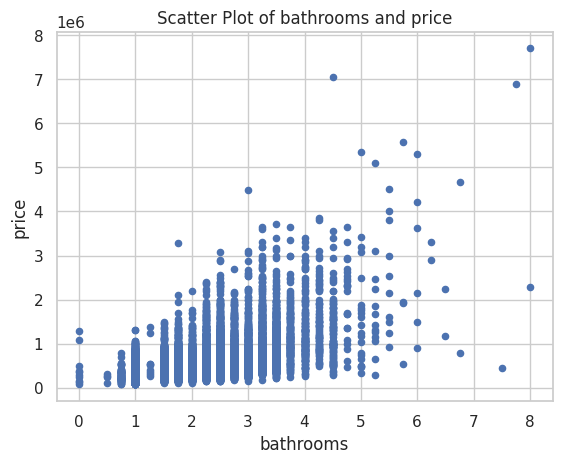

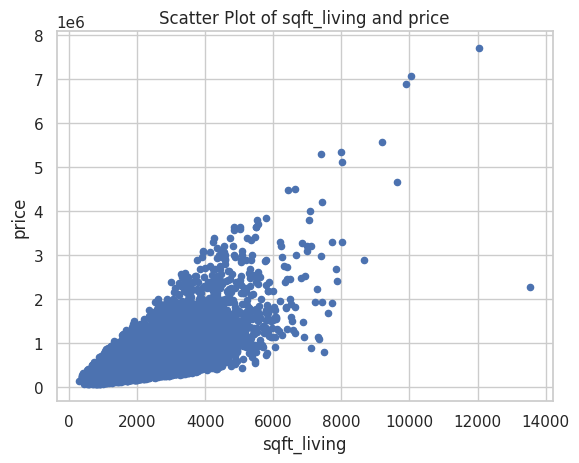

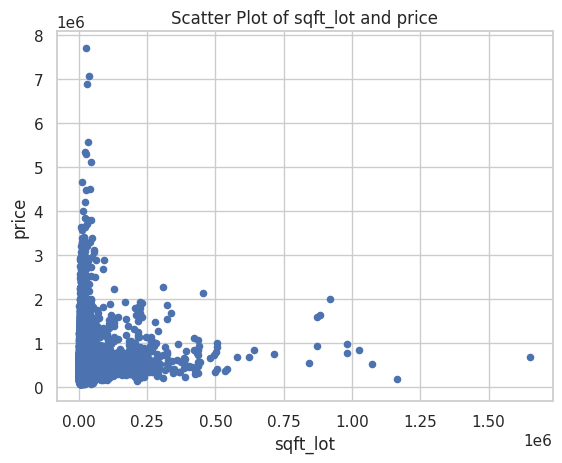

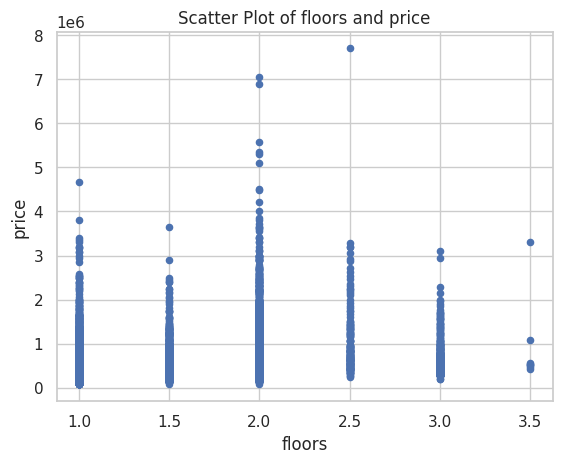

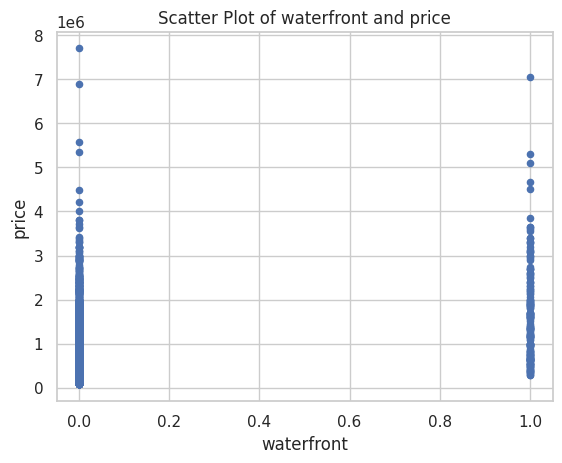

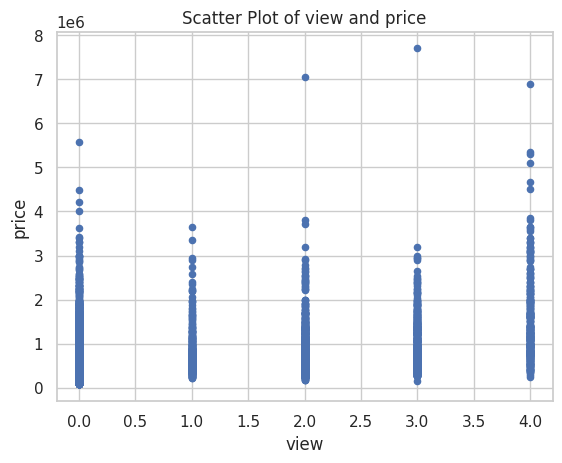

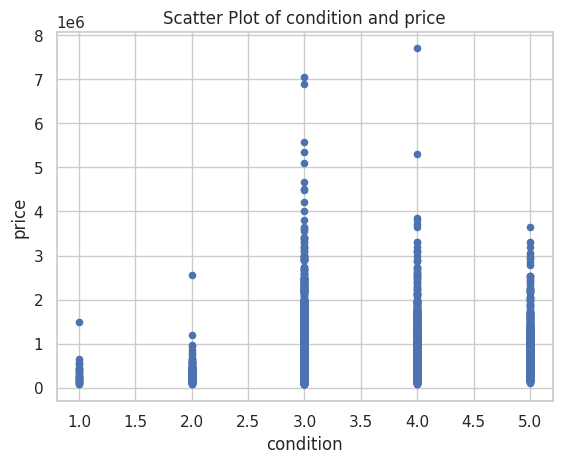

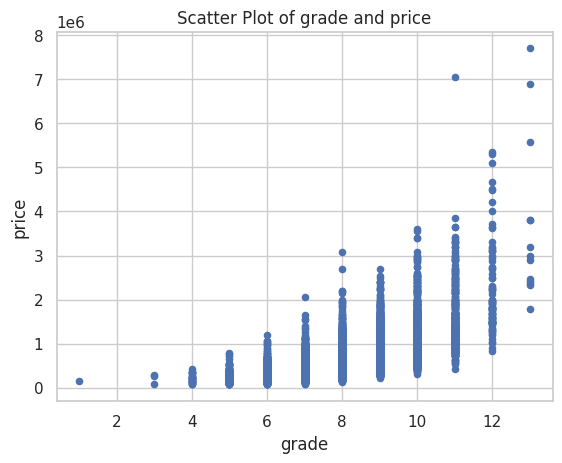

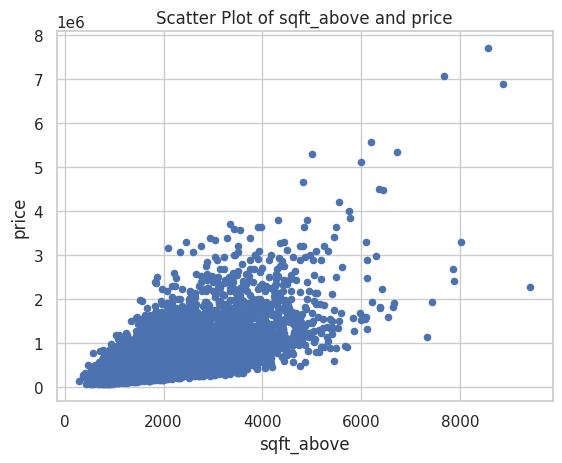

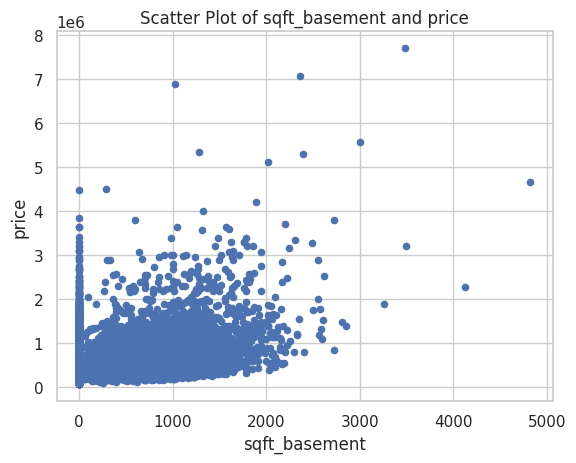

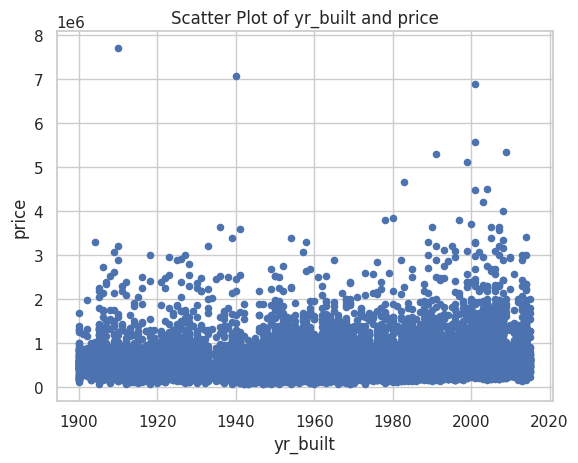

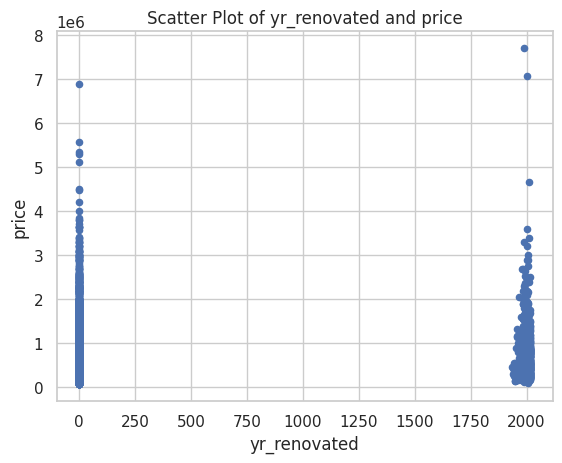

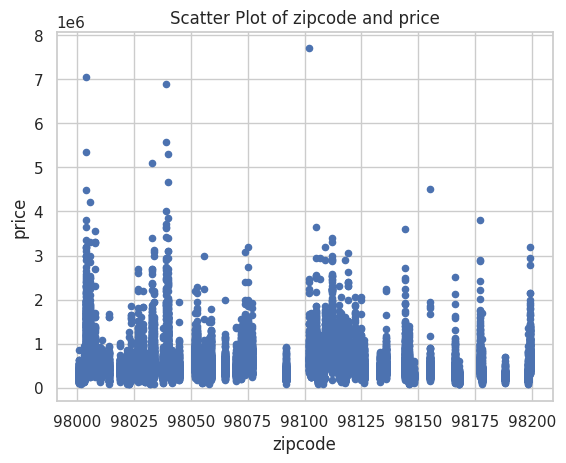

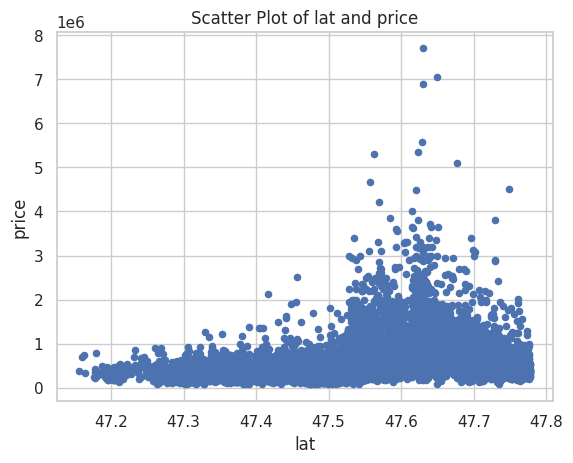

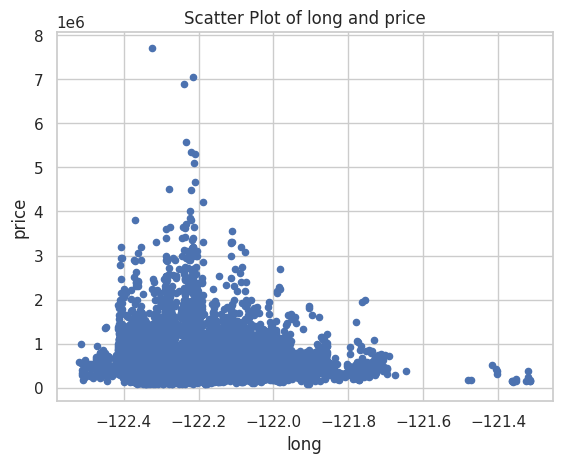

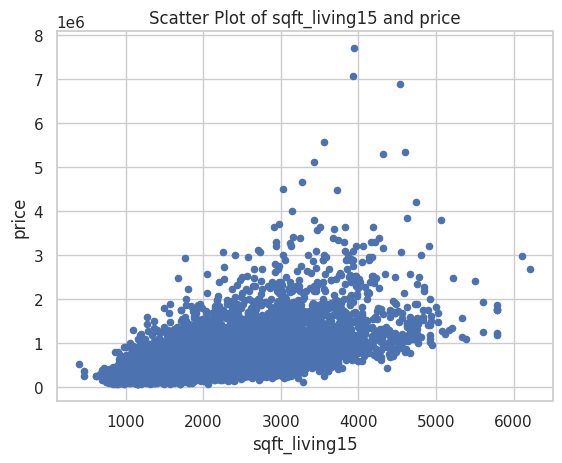

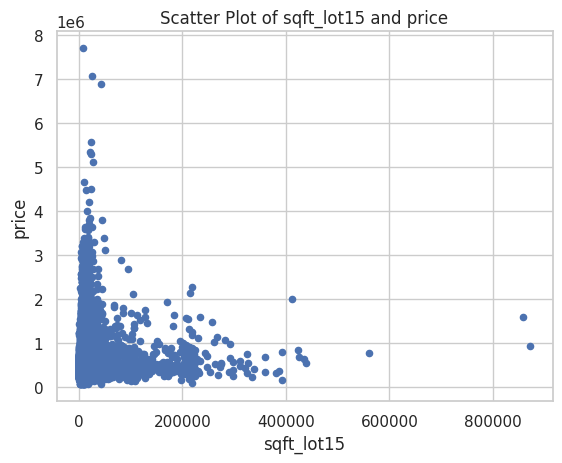

In [ ]:
for col in sales[columns]:
    sales.plot.scatter(x=col, y='price', title='Scatter Plot of '+ col + ' and price');

### Boxplots

O boxplot é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis. Este tipo de gráfico permite visualizar rapidamente a distribuição de valores em um conjunto de dados e ver onde estão localizadas as cinco estatísticas de resumo numéricos. Outro ponto importante a ser observado é que o boxplot nos dá um indicativo da existência e o volume de **outliers**, caso existam.

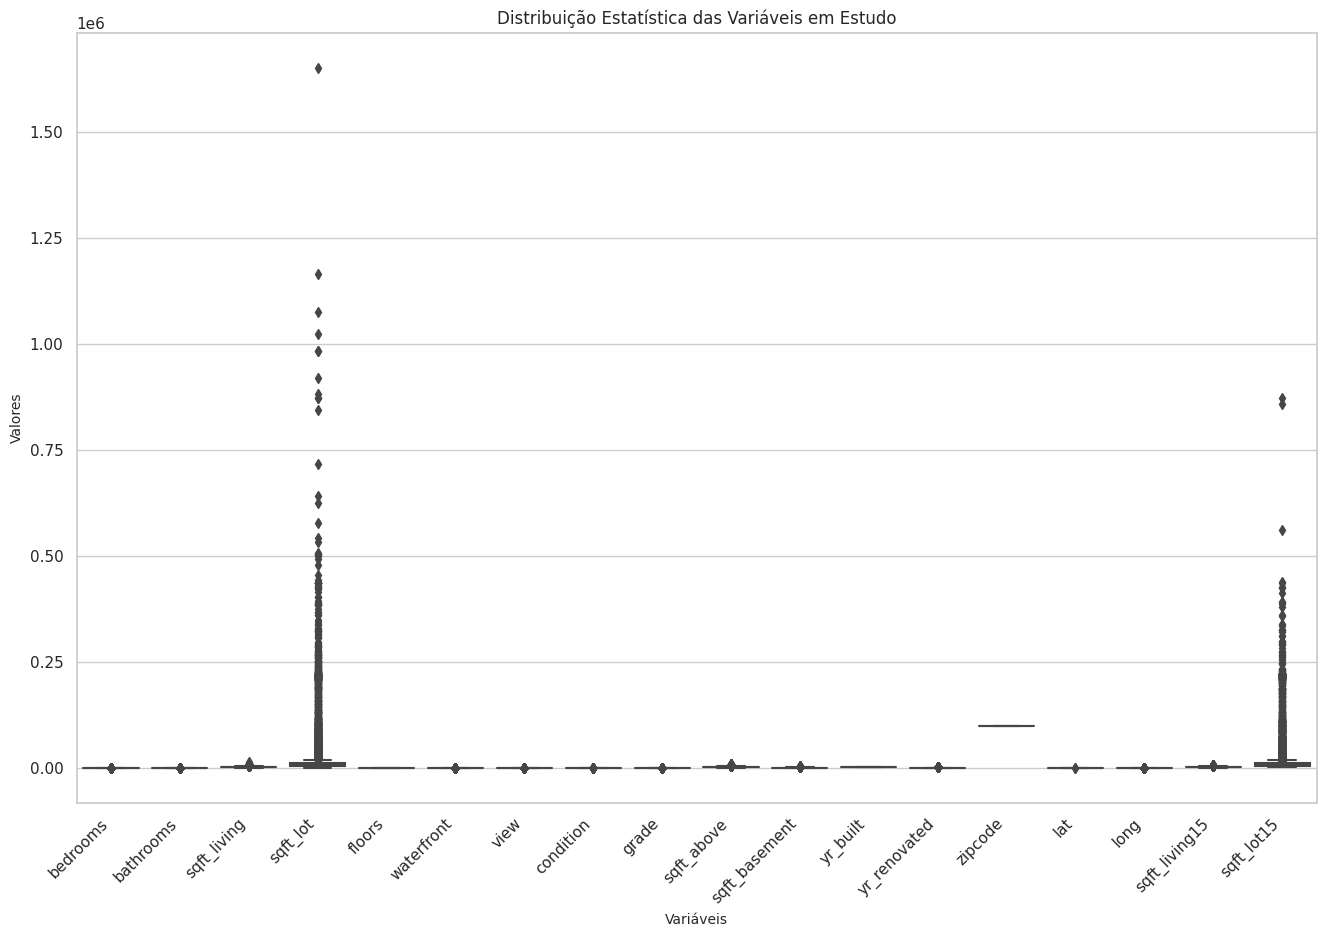

In [ ]:
# Configuração da estética do Seaborn
sns.set(style="whitegrid")

# Criar boxplots usando o Seaborn
plt.figure(figsize=(16, 10))
ax = sns.boxplot(data=sales[columns])
plt.title("Distribuição Estatística das Variáveis em Estudo", fontsize=12)
plt.xlabel("Variáveis", fontsize=10)
plt.ylabel("Valores", fontsize=10)

# Adiciona informações no boxplot
for i in range(len(columns)):
    ax.text(i, sales[columns].max().max() + 1.5, "",
            ha='center', va='center', color='grey', fontsize=10)

# Inclinar a legenda do eixo x em 45 graus
plt.xticks(rotation=45, ha='right')

plt.show()

## Covariância, Correlação e Colinearidade

### Variância e Covariância
Quando medimos o spread da distribuição de alguma variável aleatória X, calculamos a variância e o desvio padrão, como:

![alt text](fig/fig1.png "Variância")


A variação entre X e Y é chamada de covariância. Para encontrar a covariância de X e Y, usamos a mesma abordagem acima:

![alt text](fig/fig2.png "Covariância")

Portanto, a covariância de X e Y pode ser negativa ou positiva. Como a covariância não é normalizada, ela apenas descreve uma tendência entre duas variáveis.

### Correlação e Colinearidade
Para medir a força da tendência, precisamos normalizar a covariância. Assim, a covariância normalizada pelos desvios padrão de X e Y é um coeficiente de correlação (ou coeficiente de correlação de Pearson), que é definido abaixo:

![alt text](fig/fig3.png "Coeficiente de correlação")

Assim, os valores do coeficiente de correlação estão entre -1 e +1.
Para classificar a força da correlação, os seguintes intervalos são comumente usados:

![alt text](fig/fig4.png "Classificação da força de correlação")

Sinais positivos e negativos indicam a tendência da correlação.

Quando duas variáveis ​​estão fortemente correlacionadas entre si, elas são colineares. Se houver correlações fortes com múltiplas variáveis, é multicolinearidade.

### Por que esse poderia ser um problema?

* A colinearidade tende a inflacionar a variância de pelo menos um coeficiente de regressão estimado.

* Isto pode fazer com que pelo menos alguns coeficientes de regressão tenham sinais errados.

Maneiras de lidar com a colinearidade

* Ignore se a previsão dos valores de y for o objeto do seu estudo, então a colinearidade não será um problema.

* Livre-se das variáveis **redundantes** usando a técnica de seleção de variáveis.

Existem múltiplas técnicas para selecionar variáveis que estão menos correlacionadas mas com alta importância

1. Método de correlação

2. PCA (Análise de Componentes Principais)

3. SVD (Decomposição de Valor Singular)

4. Algoritmos de aprendizado de máquina (floresta randômica, árvores de decisão)

### Por quê esse não deve ser considerado um problema neste caso?

* A colinearidade afeta apenas a variância das estimativas dos coeficientes e dos valores dos coefientes de correlação. Desta forma, ela afeta a interpretabilidade do modelo mas, não a capacidade de previsão do modelo.

* Portanto, se o objetivo é construir um modelo de regressão para fazer previsões e não precisa entender a influência de cada variável independente, não é necessário se preocupar com a colinearidade do modelo.

In [ ]:
sales[columns].cov()

bedrooms    bathrooms   sqft_living      sqft_lot  \
bedrooms          0.824411     0.370017  4.932132e+02  1.233544e+03   
bathrooms         0.370017     0.593151  5.338120e+02  2.798944e+03   
sqft_living     493.213155   533.811988  8.435337e+05  6.574684e+06   
sqft_lot       1233.544374  2798.943628  6.574684e+06  1.715659e+09   
floors            0.088768     0.208211  1.755404e+02 -1.163286e+02   
waterfront       -0.000520     0.004247  8.249461e+00  7.741867e+01   
view              0.056999     0.110800  2.003143e+02  2.371393e+03   
condition         0.015098    -0.062638 -3.511460e+01 -2.414616e+02   
grade             0.391135     0.602005  8.234077e+02  5.531997e+03   
sqft_above      368.840318   437.087555  6.666978e+05  6.294462e+06   
sqft_basement   124.372837    96.724433  1.768358e+05  2.802218e+05   
yr_built          4.244216    11.447333  8.580238e+03  6.458085e+04   
yr_renovated      7.151933    15.696537  2.042442e+04  1.271708e+05   
zipcode          -7.630866    -8.400840 -9.800232e+03 -2.871637e+05   
lat              -0.001322     0.002622  6.685035e+00 -4.917661e+02   
long              0.017115     0.024191  3.107108e+01  1.338837e+03   
sqft_living15   250.532797   300.161076  4.761601e+05  4.105319e+06   
sqft_lot15      753.471274  1833.182173  4.596302e+06  8.126540e+08   

                   floors  waterfront         view   condition        grade  \
bedrooms         0.088768   -0.000520     0.056999    0.015098     0.391135   
bathrooms        0.208211    0.004247     0.110800   -0.062638     0.602005   
sqft_living    175.540402    8.249461   200.314304  -35.114601   823.407664   
sqft_lot      -116.328567   77.418670  2371.393311 -241.461641  5531.996968   
floors           0.291588    0.001107     0.012184   -0.092686     0.290824   
waterfront       0.001107    0.007485     0.026643    0.000938     0.008418   
view             0.012184    0.026643     0.587243    0.022934     0.226383   
condition       -0.092686    0.000938     0.022934    0.423467    -0.110664   
grade            0.290824    0.008418     0.226383   -0.110664     1.381703   
sqft_above     234.260251    5.163720   106.387032  -85.257275   735.805403   
sqft_basement  -58.719850    3.085741    93.927272   50.142673    87.602262   
yr_built         7.761250   -0.066483    -1.202897   -6.908312    15.432403   
yr_renovated     1.374814    3.227949    31.987181  -15.844882     6.805809   
zipcode         -1.708121    0.140191     3.478060    0.105343   -11.626523   
lat              0.003712   -0.000171     0.000654   -0.001347     0.018582   
long             0.009538   -0.000511    -0.008461   -0.009760     0.032838   
sqft_living15  103.586570    5.127103   147.294289  -41.400888   574.590703   
sqft_lot15    -166.152367   72.529786  1518.526494  -60.509350  3827.253753   

                 sqft_above  sqft_basement      yr_built   yr_renovated  \
bedrooms       3.688403e+02     124.372837      4.244216       7.151933   
bathrooms      4.370876e+02      96.724433     11.447333      15.696537   
sqft_living    6.666978e+05  176835.841250   8580.237559   20424.415773   
sqft_lot       6.294462e+06  280221.828097  64580.849602  127170.798815   
floors         2.342603e+02     -58.719850      7.761250       1.374814   
waterfront     5.163720e+00       3.085741     -0.066483       3.227949   
view           1.063870e+02      93.927272     -1.202897      31.987181   
condition     -8.525727e+01      50.142673     -6.908312     -15.844882   
grade          7.358054e+02      87.602262     15.432403       6.805809   
sqft_above     6.857347e+05  -19036.827151  10310.842663    7745.114813   
sqft_basement -1.903683e+04  195872.668401  -1730.605104   12679.300961   
yr_built       1.031084e+04   -1730.605104    862.797262   -2653.212782   
yr_renovated   7.745115e+03   12679.300961  -2653.212782  161346.211862   
zipcode       -1.157255e+04    1772.319511   -545.148312    1383.152755   
lat           -9.368779e-02       6.77872

from matplotlib import pyplot as plt
_df_45['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46['bathrooms'].plot(kind='hist', bins=20, title='bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47['sqft_living'].plot(kind='hist', bins=20, title='sqft_living')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48['sqft_lot'].plot(kind='hist', bins=20, title='sqft_lot')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49.plot(kind='scatter', x='bedrooms', y='bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50.plot(kind='scatter', x='bathrooms', y='sqft_living', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51.plot(kind='scatter', x='sqft_living', y='sqft_lot', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52.plot(kind='scatter', x='sqft_lot', y='floors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53['bedrooms'].plot(kind='line', figsize=(8, 4), title='bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_54['bathrooms'].plot(kind='line', figsize=(8, 4), title='bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_55['sqft_living'].plot(kind='line', figsize=(8, 4), title='sqft_living')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_56['sqft_lot'].plot(kind='line', figsize=(8, 4), title='sqft_lot')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
sales[columns].corr()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms       1.000000   0.529135     0.591441  0.032800  0.181050   
bathrooms      0.529135   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.591441   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.032800   0.087740     0.172826  1.000000 -0.005201   
floors         0.181050   0.500653     0.353949 -0.005201  1.000000   
waterfront    -0.006614   0.063744     0.103818  0.021604  0.023698   
view           0.081919   0.187737     0.284611  0.074710  0.029444   
condition      0.025553  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.366478   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.490556   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.309504   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.159137   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.019610   0.050739     0.055363  0.007644  0.006338   
zipcode       -0.157075  -0.203866    -0.199430 -0.129574 -0.059121   
lat           -0.010511   0.024573     0.052529 -0.085683  0.049614   
long           0.133852   0.223042     0.240223  0.229521  0.125419   
sqft_living15  0.402582   0.568634     0.756420  0.144608  0.279885   
sqft_lot15     0.030392   0.087175     0.183286  0.718557 -0.011269   

               waterfront      view  condition     grade  sqft_above  \
bedrooms        -0.006614  0.081919   0.025553  0.366478    0.490556   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685342   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876597   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423898   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023285   
zipcode          0.030285  0.084827   0.003026 -0.184862   -0.261190   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731870   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194050   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
bedrooms            0.309504  0.159137      0.019610 -0.157075 -0.010511   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_above         -0.051943  0.423898      0.023285 -0.261190 -0.000816   
sqft_basement       1.000000 -0.133124      0.071323  0.074845  0.110538   
yr_built           -0.133124  1.000000     -0.224874 -0.346869 -0.148122   
yr_renovated        0.071323 -0.224874      1.000000  0.064357  0.029398   
zipcode             0.074845 -0.346869      0.064357  1.000000  0.267048   
lat                 0.110538 -0.148122      0.029398  0.267048  1.000000   
long               -0.144765  0.409356     -0.068372 -0.564072 -0.135512   
sqft

from matplotlib import pyplot as plt
_df_57['bedrooms'].plot(kind='hist', bins=20, title='bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58['bathrooms'].plot(kind='hist', bins=20, title='bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59['sqft_living'].plot(kind='hist', bins=20, title='sqft_living')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_60['sqft_lot'].plot(kind='hist', bins=20, title='sqft_lot')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_61.plot(kind='scatter', x='bedrooms', y='bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_62.plot(kind='scatter', x='bathrooms', y='sqft_living', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_63.plot(kind='scatter', x='sqft_living', y='sqft_lot', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64.plot(kind='scatter', x='sqft_lot', y='floors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65['bedrooms'].plot(kind='line', figsize=(8, 4), title='bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_66['bathrooms'].plot(kind='line', figsize=(8, 4), title='bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_67['sqft_living'].plot(kind='line', figsize=(8, 4), title='sqft_living')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_68['sqft_lot'].plot(kind='line', figsize=(8, 4), title='sqft_lot')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
abs(sales[columns].corr()) > 0.70

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
bedrooms           True      False        False     False   False       False   
bathrooms         False       True         True     False   False       False   
sqft_living       False       True         True     False   False       False   
sqft_lot          False      False        False      True   False       False   
floors            False      False        False     False    True       False   
waterfront        False      False        False     False   False        True   
view              False      False        False     False   False       False   
condition         False      False        False     False   False       False   
grade             False      False         True     False   False       False   
sqft_above        False      False         True     False   False       False   
sqft_basement     False      False        False     False   False       False   
yr_built          False      False        False     False   False       False   
yr_renovated      False      False        False     False   False       False   
zipcode           False      False        False     False   False       False   
lat               False      False        False     False   False       False   
long              False      False        False     False   False       False   
sqft_living15     False      False         True     False   False       False   
sqft_lot15        False      False        False      True   False       False   

                view  condition  grade  sqft_above  sqft_basement  yr_built  \
bedrooms       False      False  False       False          False     False   
bathrooms      False      False  False       False          False     False   
sqft_living    False      False   True        True          False     False   
sqft_lot       False      False  False       False          False     False   
floors         False      False  False       False          False     False   
waterfront     False      False  False       False          False     False   
view            True      False  False       False          False     False   
condition      False       True  False       False          False     False   
grade          False      False   True        True          False     False   
sqft_above     False      False   True        True          False     False   
sqft_basement  False      False  False       False           True     False   
yr_built       False      False  False       False          False      True   
yr_renovated   False      False  False       False          False     False   
zipcode        False      False  False       False          False     False   
lat            False      False  False       False          False     False   
long           False      False  False       False          False     False   
sqft_living15  False      False   True        True          False     False   
sqft_lot15     False      False  False       False          False     False   

               yr_renovated  zipcode    lat   long  sqft_living15  sqft_lot15  
bedrooms              False    False  False  False          False       False  
bathrooms             False    False  False  False          False       False  
sqft_living           False    False  False  False           True       False  
sqft_lot              False    False  False  False          False        True  
floors                False    False  False  False          False       False  
waterfront            False    False  False  False          False       False  
view                  False    False  False  False          False       False  
condition             False    False  False  False          False       False  
grade                 False    False  False  False           True       False  
sqft_above            False    False  False  False           True       False  
sqft_basement         False    False  False  False          False       False  
yr_built     

from matplotlib import pyplot as plt
import seaborn as sns
_df_69.groupby('bedrooms').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_70.groupby('bathrooms').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_71.groupby('sqft_living').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_72.groupby('sqft_lot').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['bathrooms'].value_counts()
    for x_label, grp in _df_73.groupby('bedrooms')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('bedrooms')
_ = plt.ylabel('bathrooms')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sqft_living'].value_counts()
    for x_label, grp in _df_74.groupby('bathrooms')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('bathrooms')
_ = plt.ylabel('sqft_living')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sqft_lot'].value_counts()
    for x_label, grp in _df_75.groupby('sqft_living')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sqft_living')
_ = plt.ylabel('sqft_lot')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['floors'].value_counts()
    for x_label, grp in _df_76.groupby('sqft_lot')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sqft_lot')
_ = plt.ylabel('floors')

### Mapas de calor

Os mapas de calor de correlação são um tipo de gráfico que visualiza a força das relações entre variáveis numéricas. Gráficos de correlação são usados para entender quais variáveis estão relacionadas entre si e a força dessa relação. Um gráfico de correlação normalmente contém diversas variáveis numéricas, com cada variável representada por uma coluna e linha.

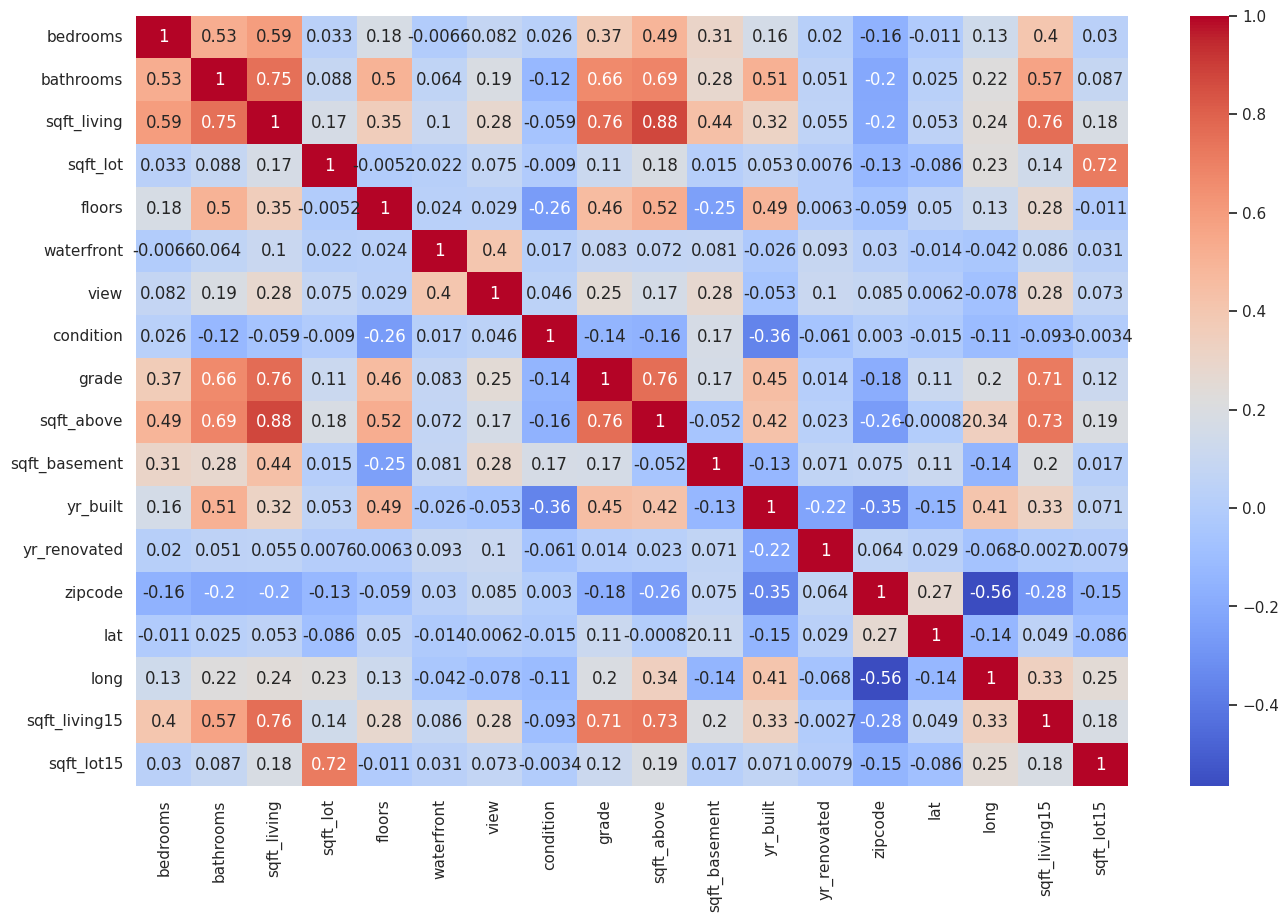

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(sales[columns].corr(), annot=True, cmap='coolwarm')
 # 'cmap' define a escala de cores
plt.show()

### Gráfico de linha

Este gráfico é usado para representar graficamente os dados e ajustar um modelo de regressão linear, representado pela linha plotada.

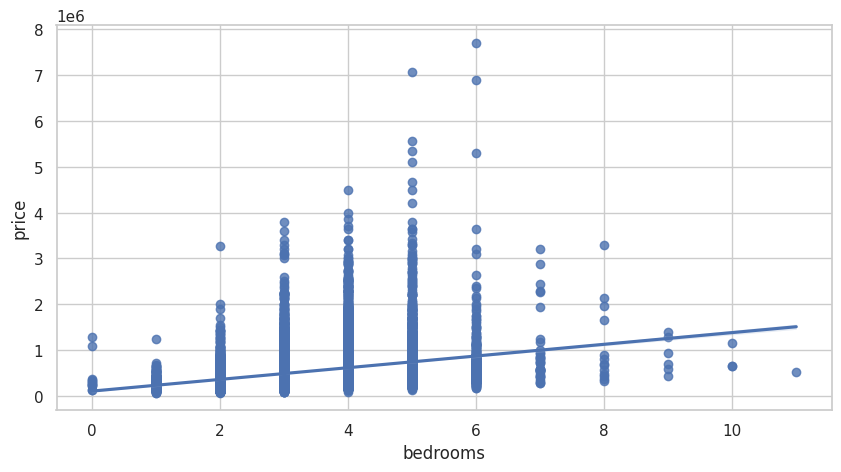

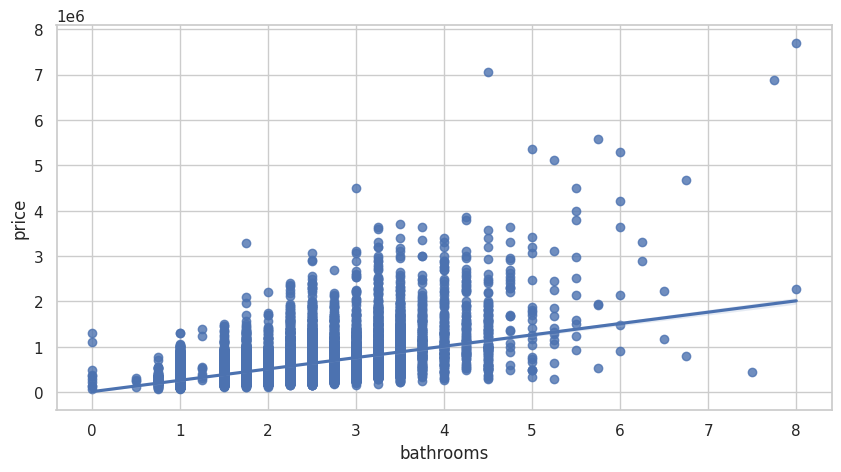

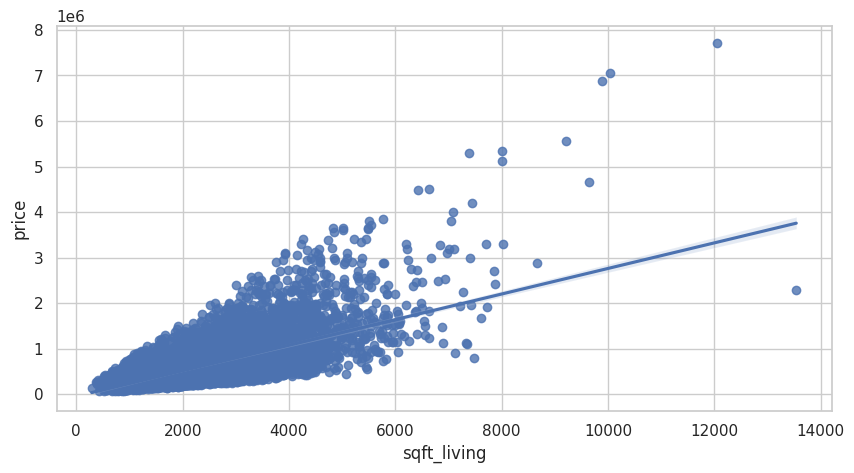

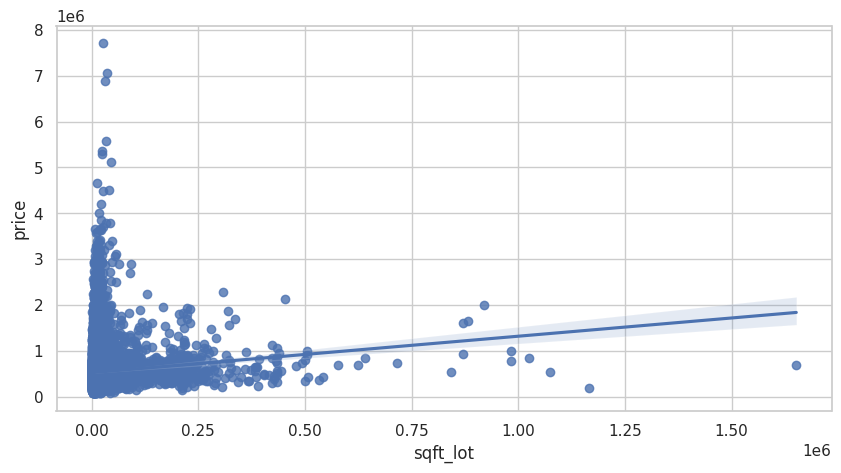

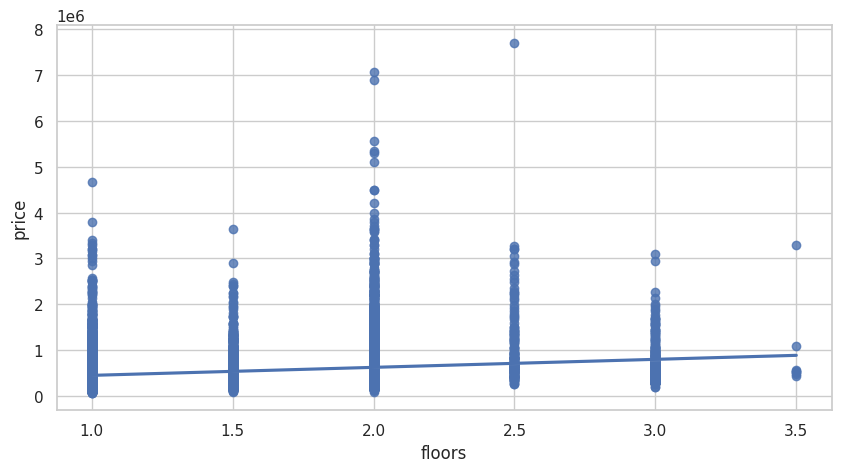

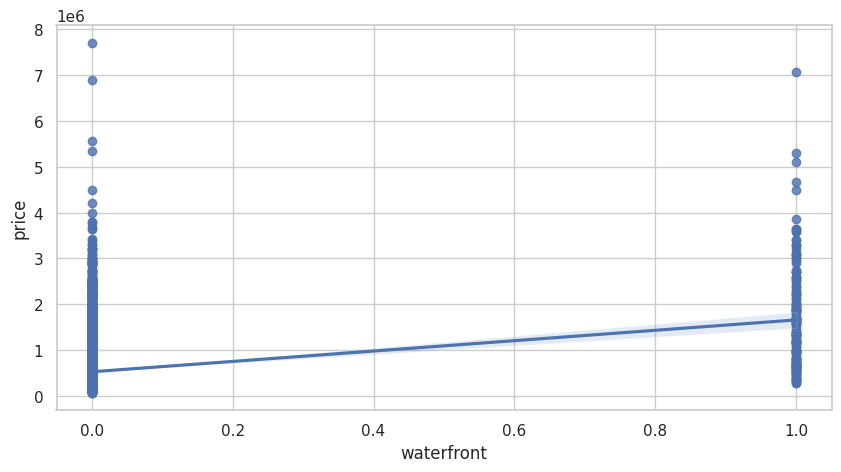

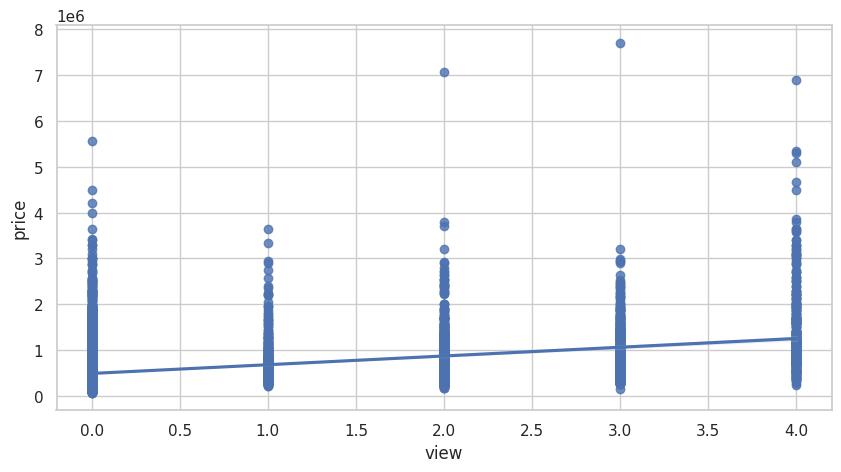

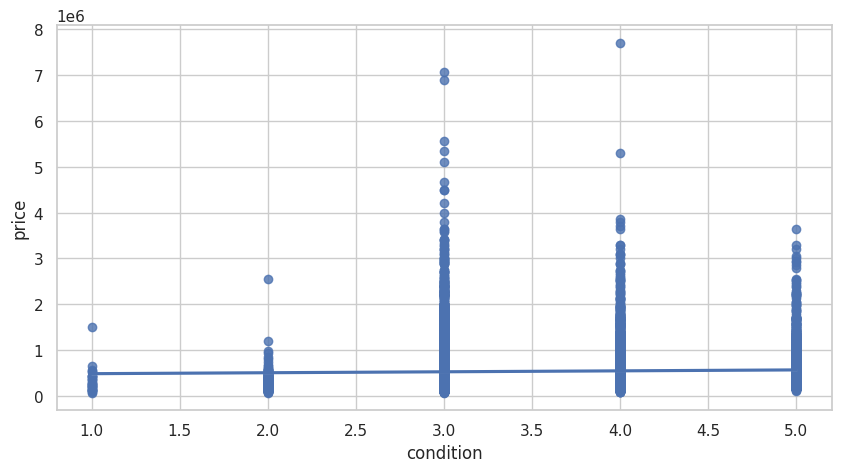

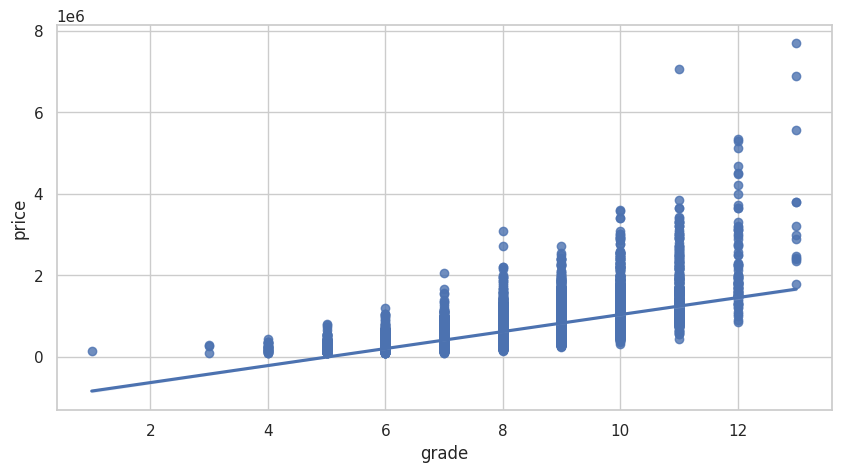

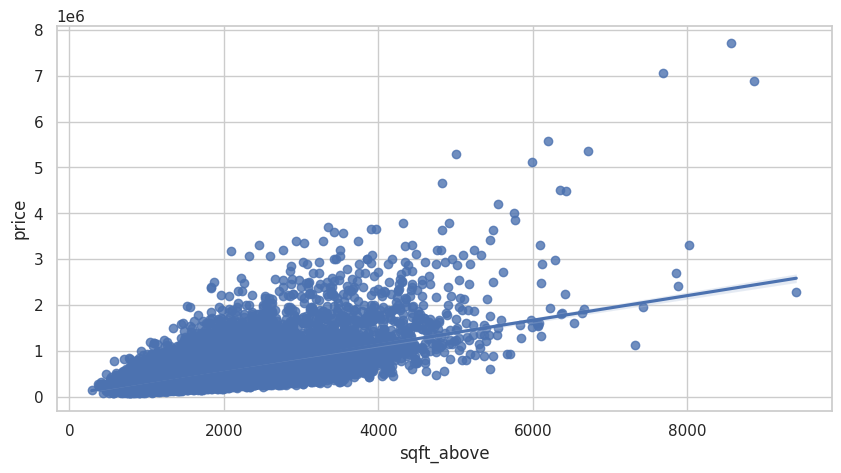

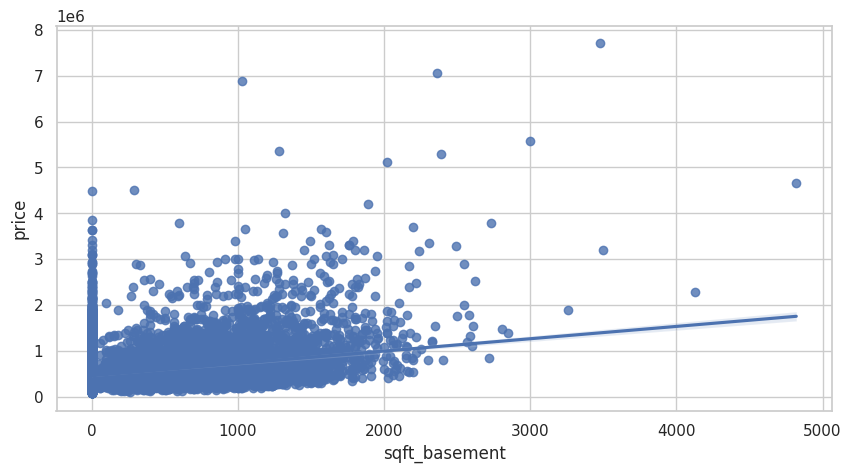

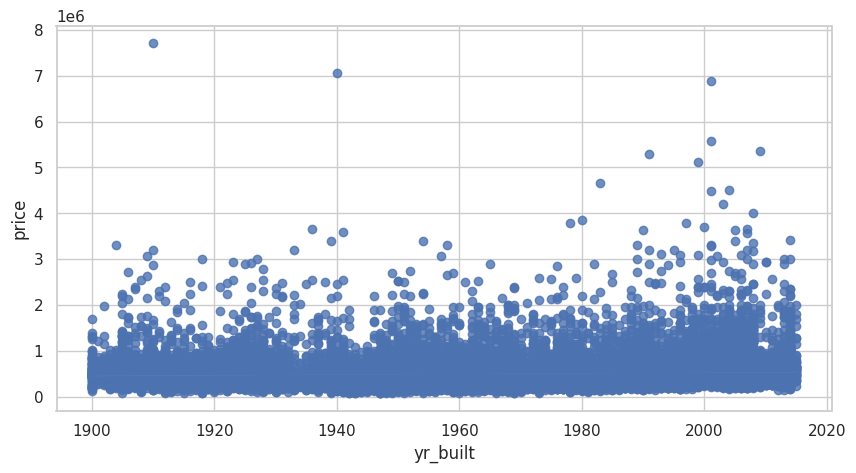

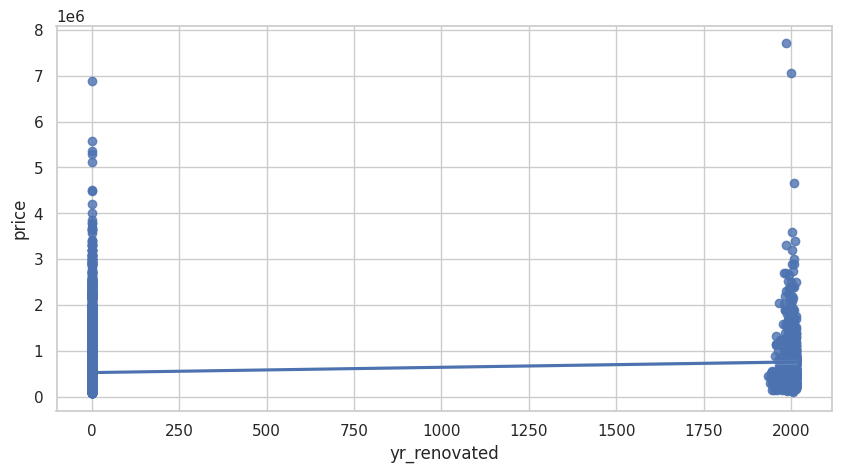

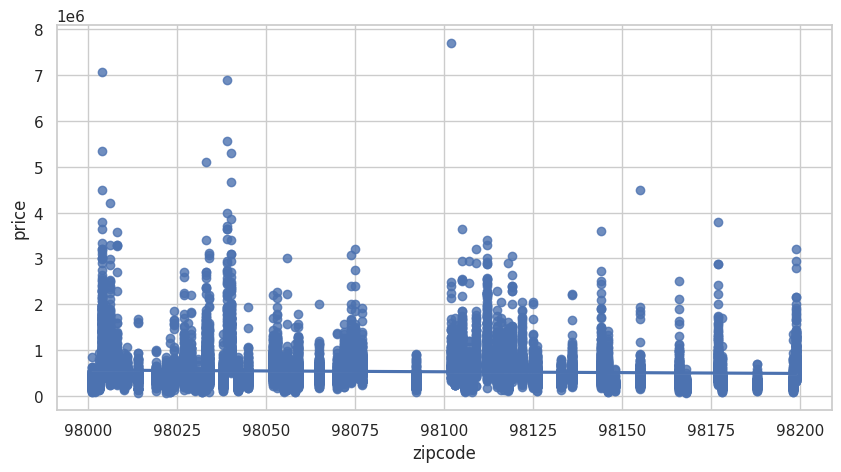

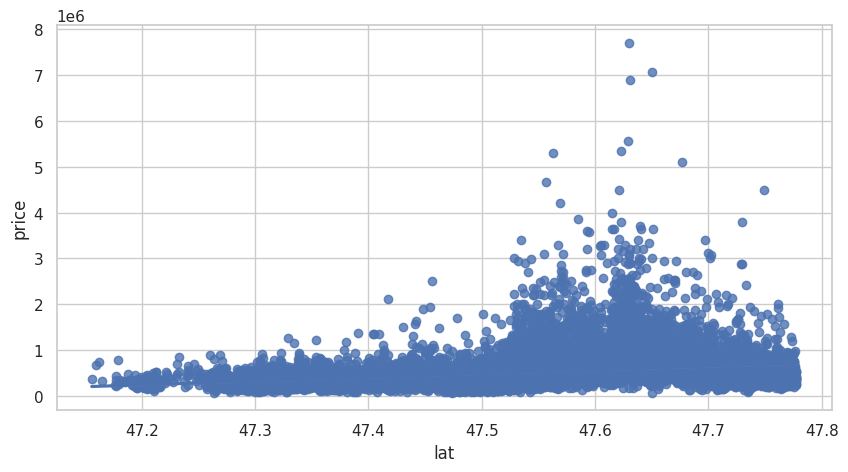

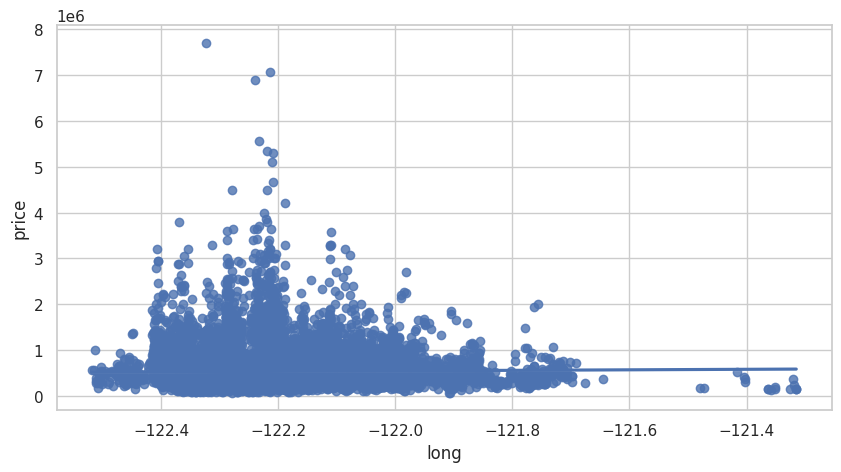

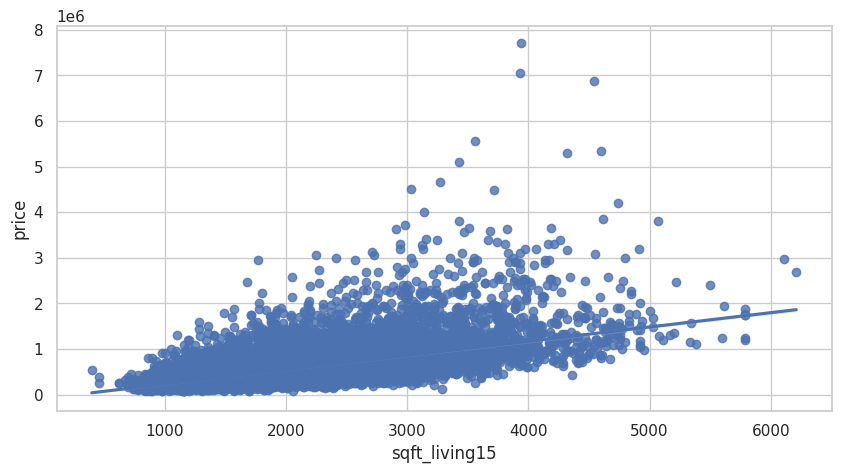

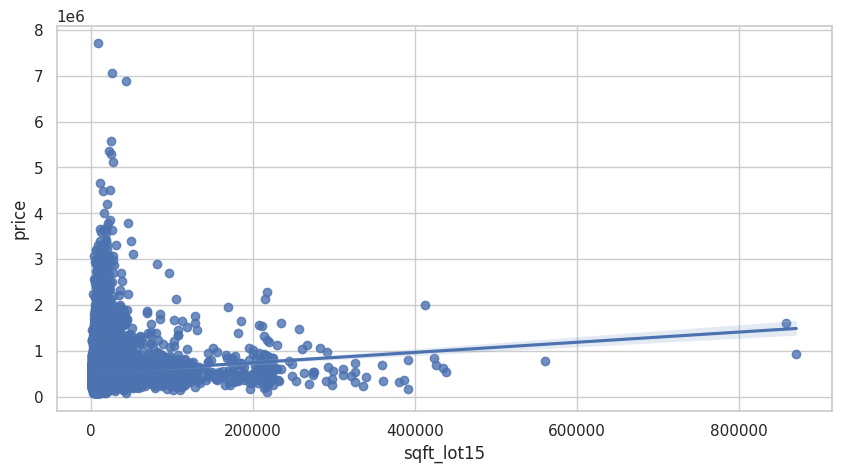

In [ ]:
for col in columns:
    plt.figure(figsize=(10, 5))
    sns.regplot(data=sales, x=col, y='price')
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()